### Opinet - 셀프 주유소가 정말 저렴할까?

In [7]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

##### 1. Selenium 으로 서울시 구별 주유소 가격정보 얻기

In [8]:
# Opinet 초기 화면 / 싼주유소 찾기/지역별
url ='https://www.opinet.co.kr/searRgSelect.do'
driver =webdriver.Chrome('file:///C:/Users/YONSAI/Downloads/chromedriver_win32/chromedriver')
driver.get(url)
time.sleep(2)

In [9]:
# 서울 자치구 리스트 가져오기
metro=driver.find_element(By.XPATH,'//*[@id="SIDO_NM0"]')     # 광역시도
metro.send_keys('서울')

In [10]:
sigungu =driver.find_element(By.XPATH,'//*[@id="SIGUNGU_NM0"]')  # 시/군/구
gu_list =sigungu.find_elements(By.TAG_NAME,'option')
gu_list[:3]

[<selenium.webdriver.remote.webelement.WebElement (session="4390830f3f189d71d7391143b05a085a", element="65bd950f-5f5f-43ec-9f3a-4c616c9b2fd8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4390830f3f189d71d7391143b05a085a", element="a36c16a5-8ecd-4879-9c2f-8b36753d13e4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4390830f3f189d71d7391143b05a085a", element="7d403cce-6f57-4479-85c7-8af4d35fab91")>]

In [11]:
gu_list[0].text,gu_list[1].text

('시/군/구', '강남구')

In [12]:
gu_names =[gu.text for gu in gu_list[1:]]   # 시/군/구를 제외한 구 이름의 리스트
gu_names[:3]

['강남구', '강동구', '강북구']

In [13]:
# 강남구 선택
sigungu.send_keys(gu_names[0])

In [14]:
# 엑셀 저장
driver.find_element(By.ID,'glopopd_excel').click()
time.sleep(2)

In [15]:
# 강남구를 제외한 나머지 자치구에 대해서 주유소 정보 엑셀 저장
for gu in gu_names[1:]:         #처음부터 끝까지
    sigungu =driver.find_element(By.XPATH,'//*[@id="SIGUNGU_NM0"]') 
    sigungu.send_keys(gu)
    time.sleep(3)
    driver.find_element(By.ID,'glopopd_excel').click()
    time.sleep(2)

In [16]:
driver.close()

#### 2. 구별 휘발유 가격에 대한 정리

In [19]:
from glob import glob
glob('C:/Users/YONSAI/Downloads/지역*.xls')

['C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (1).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (10).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (11).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (12).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (13).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (14).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (15).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (16).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (17).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (18).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (19).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (2).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (20).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (21).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (22).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (23).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (24).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (3).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (4).xls',
 'C:/Users/YONSA

In [22]:
#pip install xlrd
file = glob('C:/Users/YONSAI/Downloads/지역*.xls')[-1]
df =pd.read_excel(file,header=2)        #엑셀 헤더 2줄 날리기
df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1653,1575,-
1,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1872,1699,1654,-
2,서울특별시,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,02-445-5841,Y,-,1699,1595,-
3,서울특별시,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,현대오일뱅크,02-2226-4963,Y,1918,1699,1595,-
4,서울특별시,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),현대오일뱅크,02-508-6572,Y,1929,1699,1609,-


In [23]:
# 25개 파일을 읽어서 하나의 데이터 프레임으로 만들기 pd.concat
df_list = []
for file in glob('C:/Users/YONSAI/Downloads/지역*.xls'):
    df =pd.read_excel(file,header=2) 
    df_list.append(df)

df =pd.concat(df_list)
df.shape

(441, 10)

In [24]:
df=df[['상호','주소','휘발유','셀프여부','상표']]
df.head()

,상호,주소,휘발유,셀프여부,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1679,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1684,N,현대오일뱅크
2,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1696,N,GS칼텍스
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1696,Y,GS칼텍스
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1699,Y,GS칼텍스


In [25]:
# 컬럼명 원하는 컬럼명만 바꾸기
df.rename(columns={'휘발유':'가격','셀프여부':'셀프'},inplace=True)
df.tail()

,상호,주소,가격,셀프,상표
29,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2258,N,현대오일뱅크
30,갤러리아주유소,서울 강남구 압구정로 426,2275,N,SK에너지
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2335,N,SK에너지
32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398,N,현대오일뱅크
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스


In [26]:
# 주소를 split하고 거기서 첫번째만 가져온다
df['구'] = df.주소.str.split().str[1]               #df['구'] = df.주소.apply(lambda x: x.split()[1])
df.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1679,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1684,N,현대오일뱅크,강동구
2,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1696,N,GS칼텍스,강동구
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1696,Y,GS칼텍스,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1699,Y,GS칼텍스,강동구


In [30]:
df.구.unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [32]:
# 가격을 정수로 변환
df.가격 = df.가격.astype(int)

In [33]:
df.to_csv('data/20230426_서울주유소.csv',index=False)

#### 3. 셀프주유소는 정말 저렴할까?

In [34]:
# 셀프/일반/주유소 가격 평균
df.pivot_table('가격','셀프',aggfunc=['count','mean','min','max'])

,count,mean,min,max
,가격,가격,가격,가격
셀프,,,,
N,180,1839.133333,1604,2690
Y,261,1686.049808,1589,2140


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

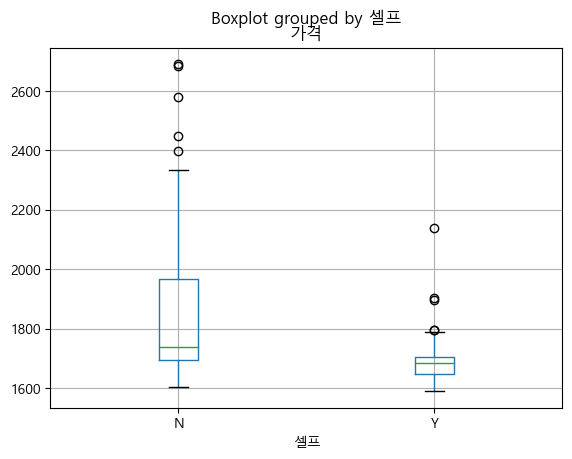

In [36]:
df.boxplot(column='가격',by='셀프')
plt.show()